<a href="https://colab.research.google.com/github/sillyc0n/optimizer-notebooks/blob/main/HRP_Yahoo_Finance_with_Custom_Money_Allocations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📊 Downloading market data for HRP Portfolio Optimization...
🎯 Selected Assets with Custom Allocations:
💰 Total Custom Portfolio Value: £48,795.83
--------------------------------------------------------------------------------
   0P000084C1.L: Aegon Asset Management High Yield Bond (Class B) £ 2,000 (  4.1%)
   0P0001ISKL.L: Artemis Short-Duration Strategic Bond (Class I) £ 2,000 (  4.1%)
   0P000132YU.L: Artemis High Income (Class I Monthly)         £6,981.07 ( 14.3%)
   0P000011UT.L: Baillie Gifford High Yield Bond (Class B)     £9,361.24 ( 19.2%)
   0P0001AP2Y.L: BNY Mellon Global Dynamic Bond (Class U)      £ 2,000 (  4.1%)
   0P00000YT0.L: EdenTree Managed Income                       £ 1,000 (  2.0%)
   0P0001PP47.L: Franklin Templeton Global Income Optimiser    £ 4,000 (  8.2%)
   0P0000XBQ1.L: Invesco High Yield Class Z                    £     0 (  0.0%)
   0P00001BA4.L: Legal & General Active Global High Yield Bond £1,992.36 (  4.1%)
   0P00013DPV.L: M&G Global Floating Rate 

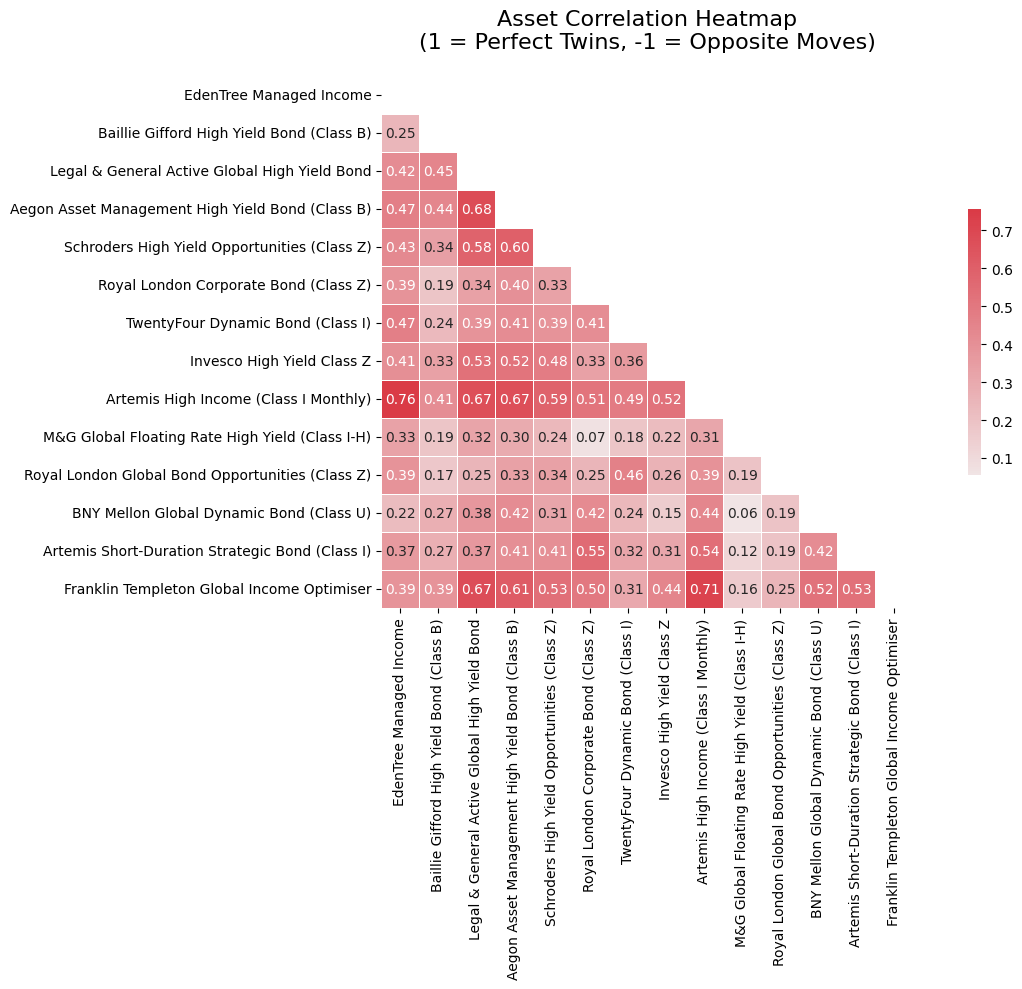

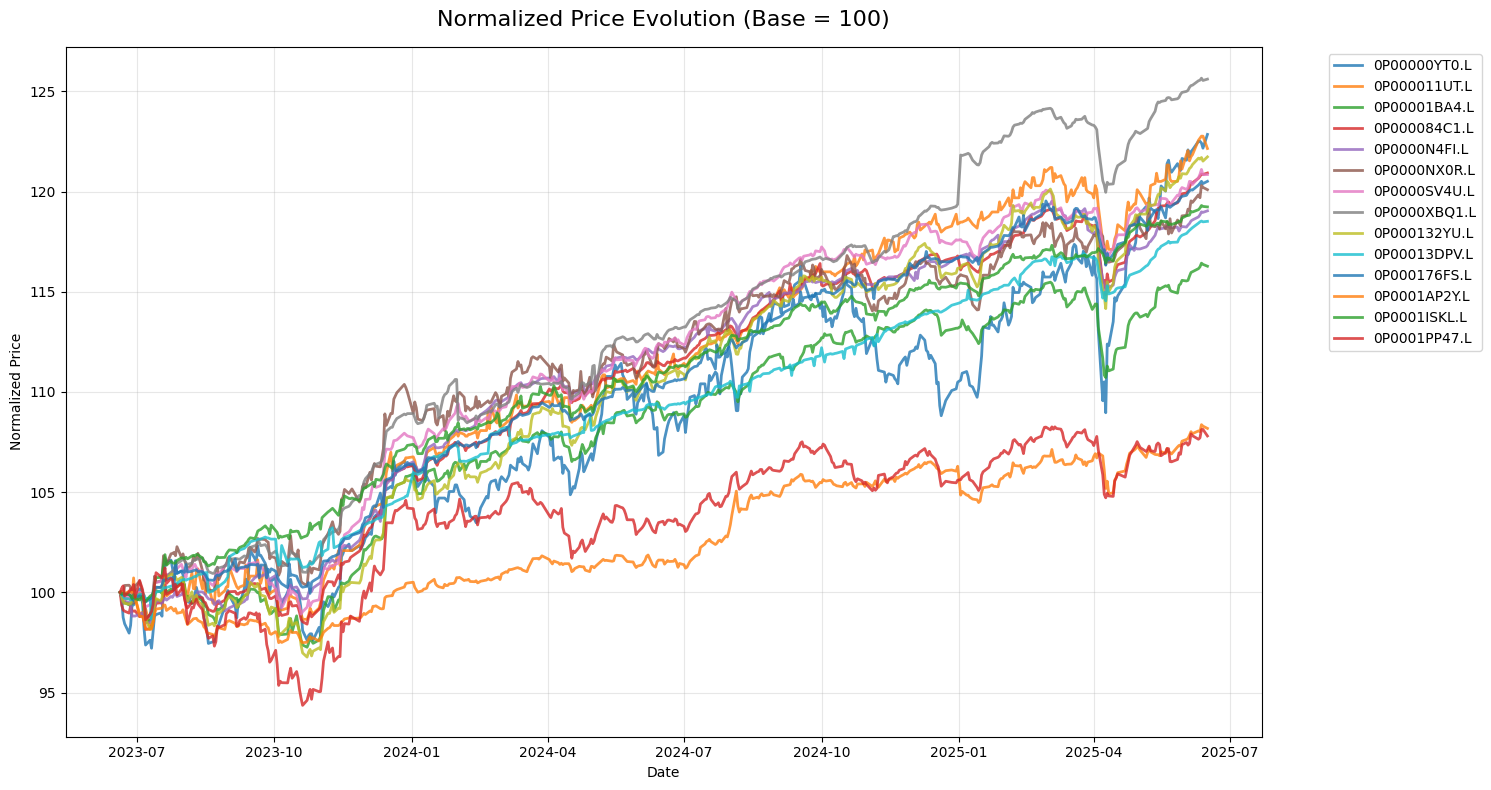

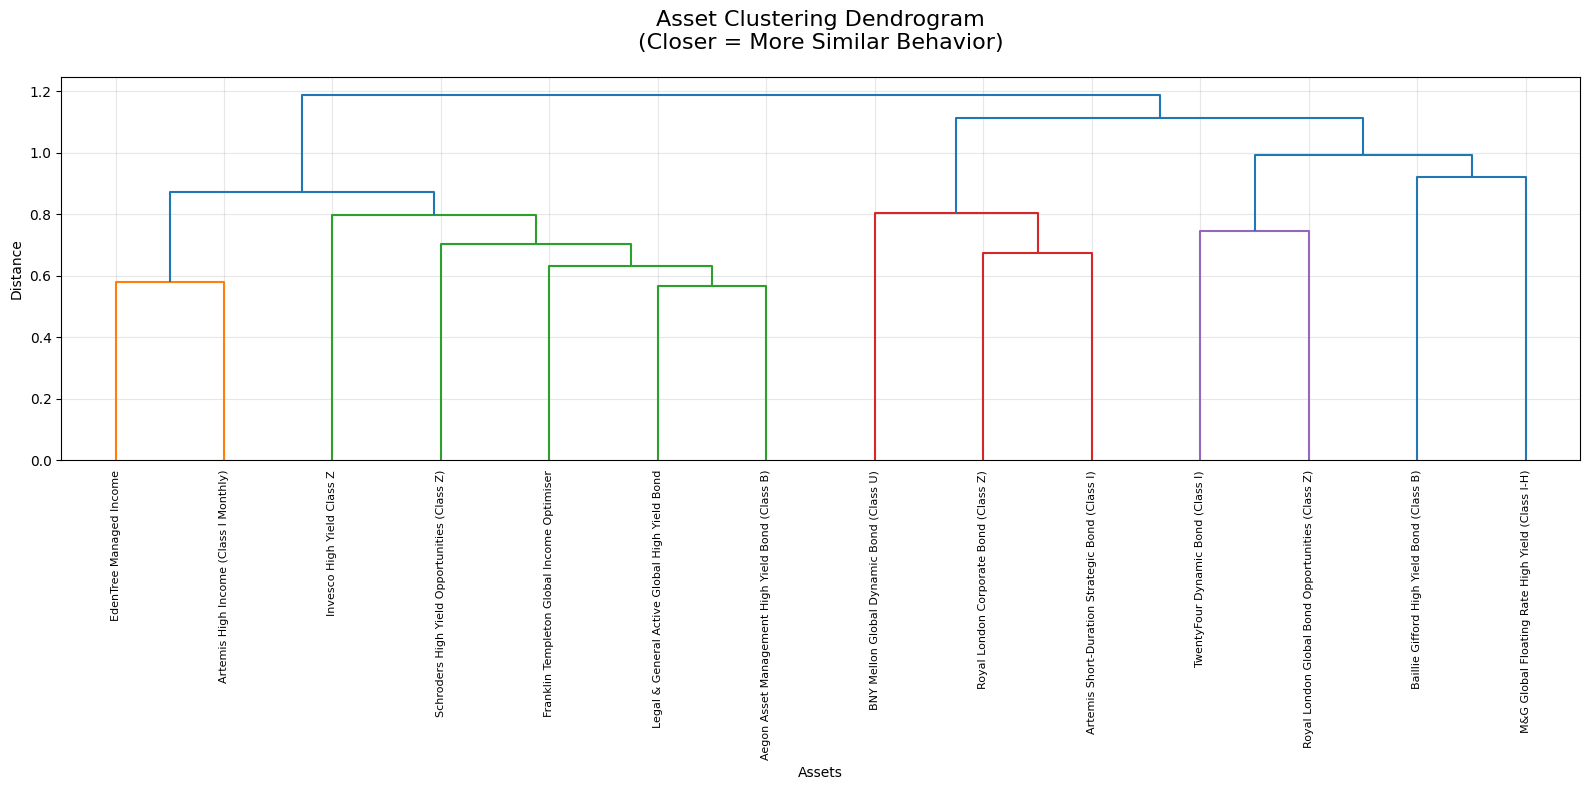

🔍 Clustering Insights:
Assets that are close together in the tree tend to move similarly
The algorithm will balance allocations across different clusters
✨ HRP Portfolio Weights:
----------------------------------------
BNY Mellon Global Dynamic Bond (Class U)     :    20.9%
Invesco High Yield Class Z                   :    16.3%
TwentyFour Dynamic Bond (Class I)            :    11.1%
Schroders High Yield Opportunities (Class Z) :     9.8%
Artemis High Income (Class I Monthly)        :     8.0%
Artemis Short-Duration Strategic Bond (Class I):     7.8%
Royal London Global Bond Opportunities (Class Z):     7.6%
M&G Global Floating Rate High Yield (Class I-H):     7.2%
Baillie Gifford High Yield Bond (Class B)    :     2.7%
EdenTree Managed Income                      :     2.2%
Aegon Asset Management High Yield Bond (Class B):     1.9%
Franklin Templeton Global Income Optimiser   :     1.6%
Royal London Corporate Bond (Class Z)        :     1.5%
Legal & General Active Global High Yield B

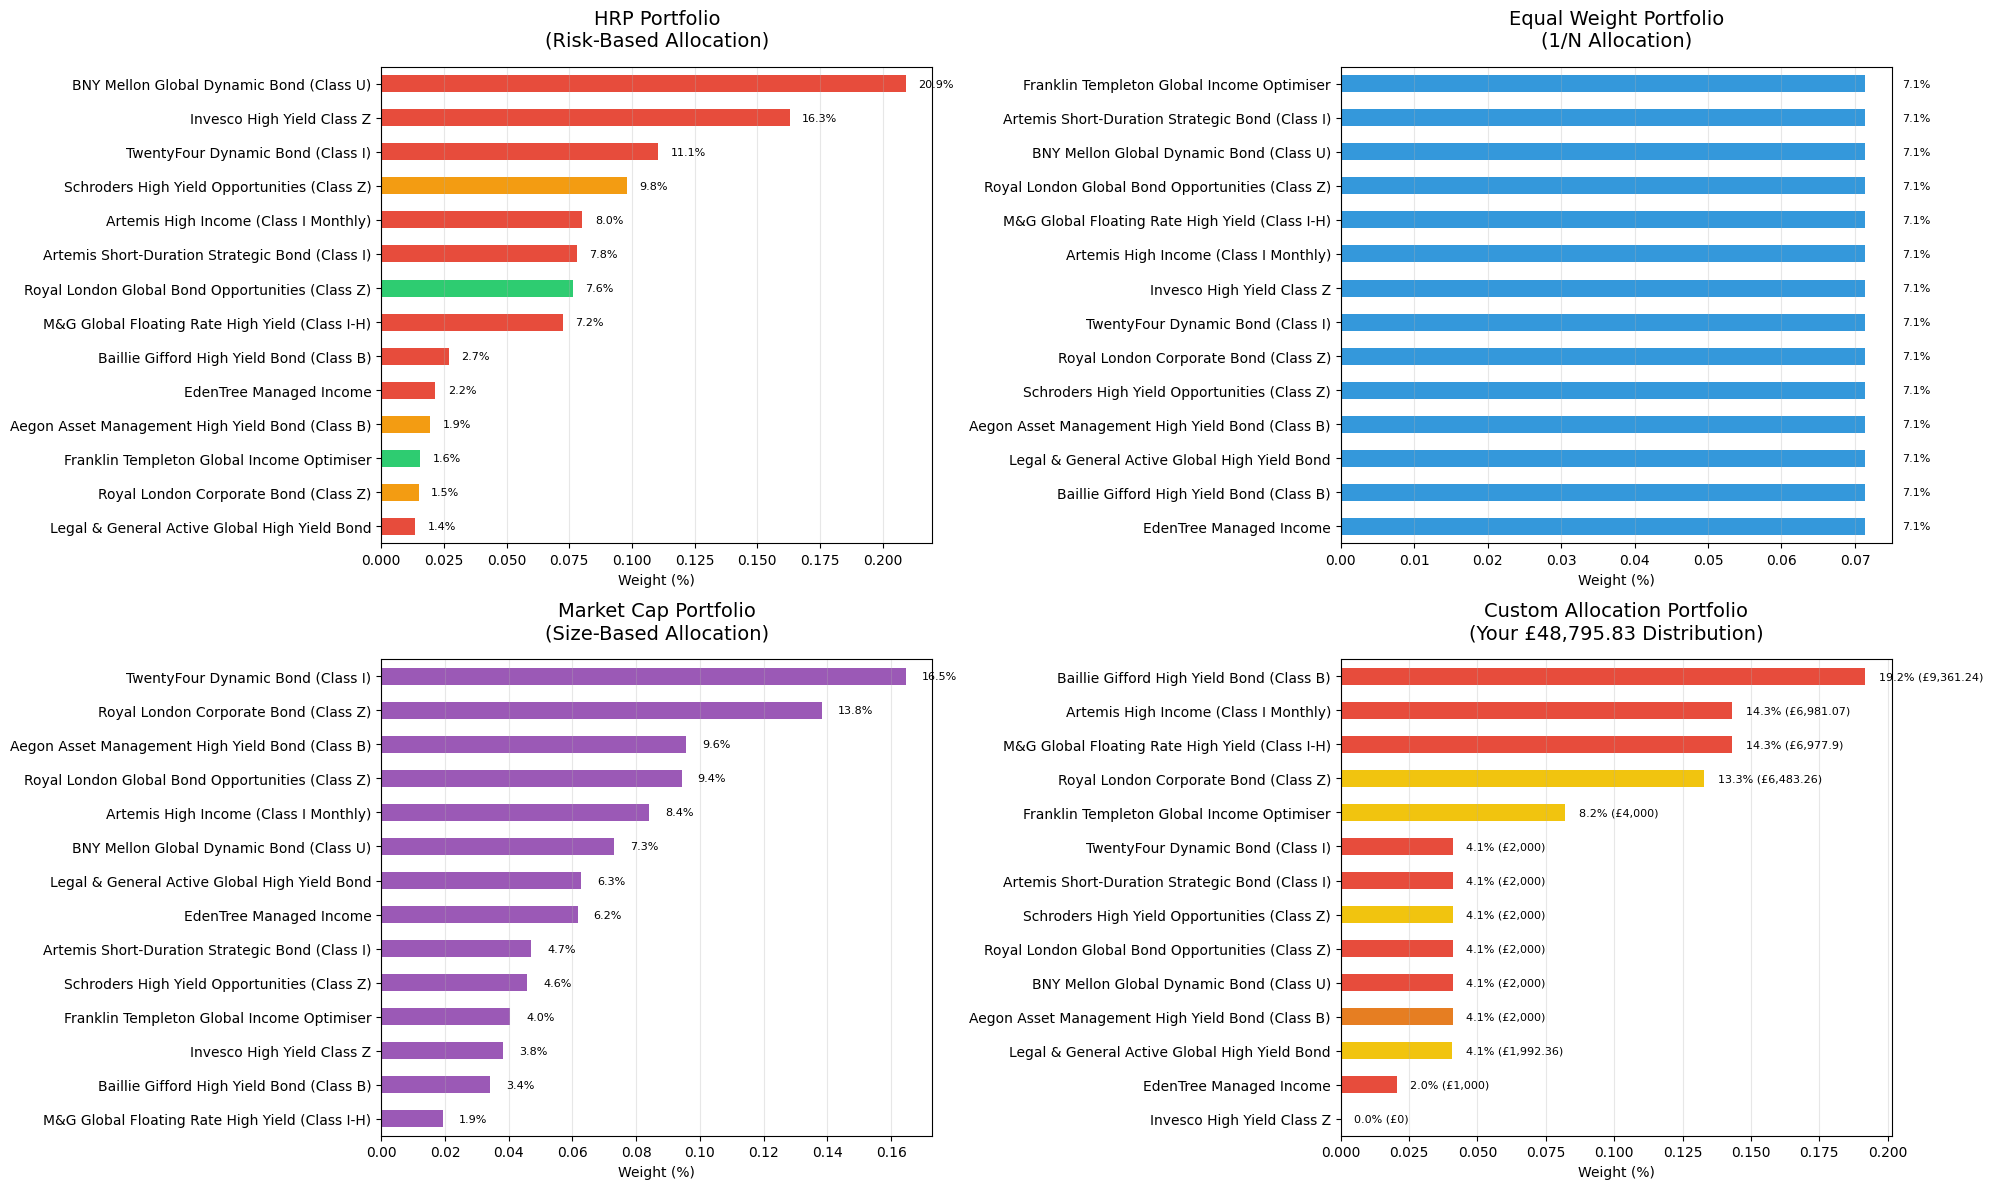

📊 Portfolio Performance Comparison:
                   HRP Portfolio  Equal Weight  Market Cap  Custom Allocation
Annual Return             0.0883        0.0910      0.0927             0.0915
Annual Volatility         0.0230        0.0281      0.0287             0.0301
Sharpe Ratio              3.8414        3.2435      3.2254             3.0417
Max Drawdown             -0.0277       -0.0308     -0.0300            -0.0299
Calmar Ratio              3.1860        2.9529      3.0894             3.0540

🏆 Best Performers:
📈 Highest Return: Market Cap (9.27%)
🛡️ Lowest Risk: HRP Portfolio (2.30%)
⚡ Best Sharpe: HRP Portfolio (3.841)
💪 Best Calmar: HRP Portfolio (3.186)


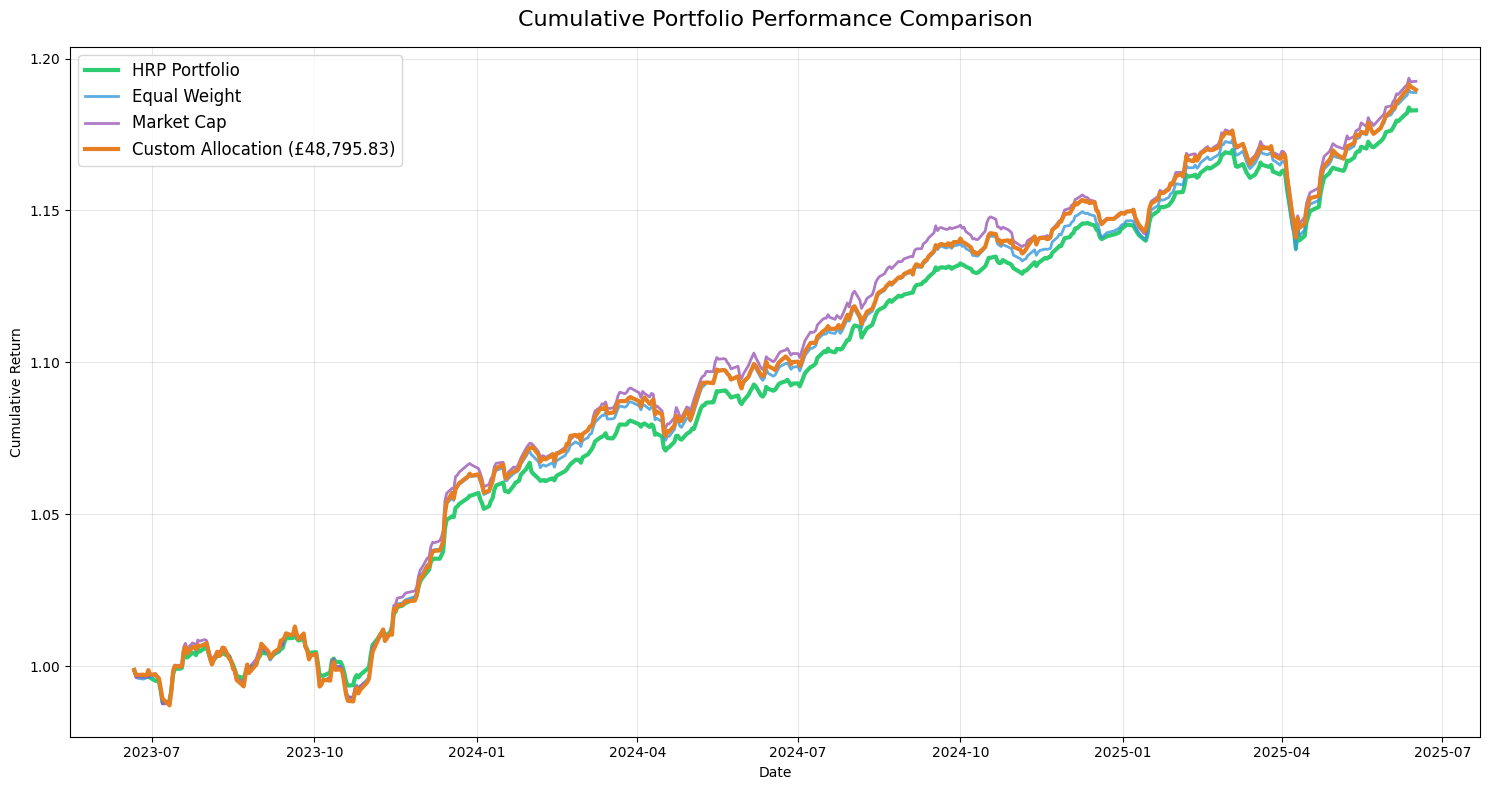

<Figure size 1500x600 with 0 Axes>

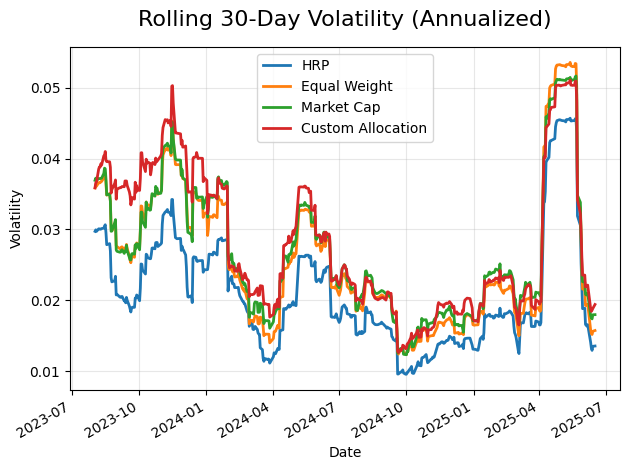


🔍 Custom vs HRP Allocation Analysis:
                                                  Custom Allocation  \
BNY Mellon Global Dynamic Bond (Class U)                     0.0410   
Baillie Gifford High Yield Bond (Class B)                    0.1918   
Invesco High Yield Class Z                                   0.0000   
Royal London Corporate Bond (Class Z)                        0.1329   
M&G Global Floating Rate High Yield (Class I-H)              0.1430   
TwentyFour Dynamic Bond (Class I)                            0.0410   
Franklin Templeton Global Income Optimiser                   0.0820   
Artemis High Income (Class I Monthly)                        0.1431   
Schroders High Yield Opportunities (Class Z)                 0.0410   
Artemis Short-Duration Strategic Bond (Class I)              0.0410   
Royal London Global Bond Opportunities (Class Z)             0.0410   
Legal & General Active Global High Yield Bond                0.0408   
Aegon Asset Management High Yield Bond 

In [5]:
# -*- coding: utf-8 -*-
"""HRP Yahoo Finance with Custom Money Allocations

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1RW4L-4YDcU83dELTiXQLUzv0qvIJFjn6
"""

# -*- coding: utf-8 -*-
"""Hierarchical Risk Parity Portfolio Optimization with Yahoo Finance Data

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1dyBwqCHIJkHRBsRcnE6EoelvVRBk3djp
"""

# %% [markdown]
# # Hierarchical Risk Parity Portfolio Optimization
# **A Visual Guide to Smart Diversification with Real Market Data**

# %% [markdown]
# ## 1. Understanding the Basics
# We're creating a portfolio that:
# 1. Groups similar investments together (like sorting fruits by type)
# 2. Distributes money based on risk relationships (safer groups get more)
# 3. Creates natural diversification (never put all eggs in one basket)
# 4. Uses real market data from Yahoo Finance
# 5. Compares with your custom money allocations

# %% [markdown]
# ## 2. Setup & Data Download
# Let's download real market data for different asset classes

# Install required packages
!pip install yfinance --quiet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
import yfinance as yf
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Define your portfolio symbols with custom money allocations
# Format: 'symbol': {'name': 'Description', 'allocation': money_amount}
SYMBOLS = {
    '0P000084C1.L': {'name': 'Aegon Asset Management High Yield Bond (Class B)', 'allocation': 2000},
    '0P0001ISKL.L': {'name': 'Artemis Short-Duration Strategic Bond (Class I)', 'allocation': 2000},
    '0P000132YU.L': {'name': 'Artemis High Income (Class I Monthly)', 'allocation': 6981.07},
    '0P000011UT.L': {'name': 'Baillie Gifford High Yield Bond (Class B)', 'allocation': 9361.24},
    '0P0001AP2Y.L': {'name': 'BNY Mellon Global Dynamic Bond (Class U)', 'allocation': 2000},
    '0P00000YT0.L': {'name': 'EdenTree Managed Income', 'allocation': 1000},
    '0P0001PP47.L': {'name': 'Franklin Templeton Global Income Optimiser', 'allocation': 4000},
    '0P0000XBQ1.L': {'name': 'Invesco High Yield Class Z', 'allocation': 0},
    '0P00001BA4.L': {'name': 'Legal & General Active Global High Yield Bond', 'allocation': 1992.36},
    '0P00013DPV.L': {'name': 'M&G Global Floating Rate High Yield (Class I-H)', 'allocation': 6977.90},
    '0P0000NX0R.L': {'name': 'Royal London Corporate Bond (Class Z)', 'allocation': 6483.26},
    '0P0000N4FI.L': {'name': 'Schroders High Yield Opportunities (Class Z)', 'allocation': 2000},
    '0P0000SV4U.L': {'name': 'TwentyFour Dynamic Bond (Class I)', 'allocation': 2000},
    '0P000176FS.L': {'name': 'Royal London Global Bond Opportunities (Class Z)', 'allocation': 2000}
}

# Extract symbol-to-name mapping for backward compatibility
SYMBOL_NAMES = {symbol: info['name'] for symbol, info in SYMBOLS.items()}

# Calculate custom allocation weights
custom_allocations = {info['name']: info['allocation'] for info in SYMBOLS.values()}
total_custom_allocation = sum(custom_allocations.values())
custom_weights = pd.Series({name: amount/total_custom_allocation
                           for name, amount in custom_allocations.items()})

print("📊 Downloading market data for HRP Portfolio Optimization...")
print("🎯 Selected Assets with Custom Allocations:")
print(f"💰 Total Custom Portfolio Value: £{total_custom_allocation:,}")
print("-" * 80)
for symbol, info in SYMBOLS.items():
    allocation_pct = (info['allocation'] / total_custom_allocation) * 100
    print(f"   {symbol}: {info['name']:<45} £{info['allocation']:>6,} ({allocation_pct:>5.1f}%)")

# %% [markdown]
# ## 3. Download and Process Market Data

def download_market_data(symbols, period='2y'):
    """Download daily price data and calculate returns"""

    # Download data
    tickers = list(symbols.keys())
    print(f"🔄 Downloading data for {len(tickers)} tickers...")

    # Download raw data
    raw_data = yf.download(tickers, period=period, progress=False)

    # Debug: print structure to understand what we got
    print(f"📊 Data shape: {raw_data.shape}")
    print(f"📊 Column structure: {type(raw_data.columns)}")

    # Handle different data structures
    if len(tickers) == 1:
        # Single ticker - columns are simple
        if 'Adj Close' in raw_data.columns:
            data = raw_data[['Adj Close']].rename(columns={'Adj Close': tickers[0]})
        else:
            data = raw_data[['Close']].rename(columns={'Close': tickers[0]})
    else:
        # Multiple tickers - check if we have MultiIndex
        if isinstance(raw_data.columns, pd.MultiIndex):
            # MultiIndex case: ('Adj Close', 'SPY'), ('Adj Close', 'QQQ'), etc.
            if 'Adj Close' in raw_data.columns.get_level_values(0):
                data = raw_data['Adj Close']
            else:
                data = raw_data['Close']
        else:
            # Fallback: assume columns are ticker names
            data = raw_data

    # Clean data
    data = data.dropna()

    if data.empty:
        raise ValueError("No data downloaded. Check your symbols and internet connection.")

    # Calculate daily returns
    returns = data.pct_change().dropna()

    # Rename columns with descriptive names
    if len(tickers) > 1:
        returns.columns = [SYMBOL_NAMES[col] for col in returns.columns]
    else:
        returns.columns = [SYMBOL_NAMES[tickers[0]]]

    print(f"✅ Downloaded {len(data)} days of data")
    print(f"📈 Calculated returns from {returns.index[0].strftime('%Y-%m-%d')} to {returns.index[-1].strftime('%Y-%m-%d')}")

    return data, returns

# Download the data - try the robust method first, fallback if needed
try:
    prices, returns = download_market_data(SYMBOLS)
except Exception as e:
    print(f"⚠️ Primary download method failed: {e}")
    print("🔄 Trying alternative method (downloading individually)...")

    # Alternative: download each ticker individually
    price_data = {}
    for symbol, info in SYMBOLS.items():
        try:
            ticker_data = yf.download(symbol, period='2y', progress=False)
            if not ticker_data.empty:
                if 'Adj Close' in ticker_data.columns:
                    price_data[info['name']] = ticker_data['Adj Close']
                else:
                    price_data[info['name']] = ticker_data['Close']
        except Exception as ticker_error:
            print(f"❌ Failed to download {symbol}: {ticker_error}")

    if not price_data:
        raise ValueError("Failed to download any data. Please check your internet connection and symbols.")

    # Combine into DataFrame
    prices = pd.DataFrame(price_data).dropna()
    returns = prices.pct_change().dropna()

    print(f"✅ Downloaded {len(prices)} days of data using alternative method")
    print(f"📈 Calculated returns from {returns.index[0].strftime('%Y-%m-%d')} to {returns.index[-1].strftime('%Y-%m-%d')}")

# Display basic statistics
print("\n📊 Return Statistics (Annualized):")
print("-" * 50)
stats = pd.DataFrame({
    'Annual Return': returns.mean() * 252,
    'Annual Volatility': returns.std() * np.sqrt(252),
    'Sharpe Ratio': (returns.mean() * 252) / (returns.std() * np.sqrt(252))
}).round(3)
print(stats)

# %% [markdown]
# ## 4. Visualizing Asset Relationships
# Let's see how these assets move together in the real market

# Calculate correlations
corr_matrix = returns.corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(250, 10, as_cmap=True)

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap=cmap, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.5}, fmt='.2f')
plt.title("Asset Correlation Heatmap\n(1 = Perfect Twins, -1 = Opposite Moves)",
          pad=20, fontsize=16)
plt.tight_layout()
plt.show()

# Show price evolution
plt.figure(figsize=(15, 8))
normalized_prices = prices / prices.iloc[0] * 100
for col in normalized_prices.columns:
    plt.plot(normalized_prices.index, normalized_prices[col],
             label=col, linewidth=2, alpha=0.8)

plt.title("Normalized Price Evolution (Base = 100)", fontsize=16, pad=15)
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# %% [markdown]
# ## 5. Creating Investment Clusters
# Grouping similar assets based on their historical behavior

# Calculate distance matrix for clustering
distance_matrix = np.sqrt((1 - corr_matrix) / 2)

# Perform hierarchical clustering
linkage_matrix = linkage(distance_matrix.values, method='ward')

# Plot dendrogram with vertical labels and smaller font
plt.figure(figsize=(16, 8))
dendrogram(linkage_matrix,
           labels=corr_matrix.columns,
           orientation='top',
           leaf_rotation=90,      # Changed from 45 to 90 for vertical
           leaf_font_size=8)      # Changed from 12 to 8 for smaller font
plt.title("Asset Clustering Dendrogram\n(Closer = More Similar Behavior)",
          pad=20, fontsize=16)
plt.xlabel("Assets")
plt.ylabel("Distance")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("🔍 Clustering Insights:")
print("Assets that are close together in the tree tend to move similarly")
print("The algorithm will balance allocations across different clusters")

# %% [markdown]
# ## 6. The HRP Magic - Weight Allocation
# Distributing money based on cluster relationships and risk

def get_cluster_items(linkage_matrix, cluster_id, n):
    """Recursively get all items in a cluster"""
    if cluster_id < n:
        return [cluster_id]
    left = int(linkage_matrix[cluster_id - n, 0])
    right = int(linkage_matrix[cluster_id - n, 1])
    return get_cluster_items(linkage_matrix, left, n) + get_cluster_items(linkage_matrix, right, n)

def hrp_allocation(cov_matrix, linkage_matrix):
    """Calculate HRP weights using recursive bisection"""
    n = cov_matrix.shape[0]
    root_cluster = 2 * n - 2

    def recursive_bisection(cluster_id):
        items = get_cluster_items(linkage_matrix, cluster_id, n)
        if len(items) == 1:
            return pd.Series(1.0, index=[cov_matrix.columns[items[0]]])

        left_id = int(linkage_matrix[cluster_id - n, 0])
        right_id = int(linkage_matrix[cluster_id - n, 1])

        left_items = get_cluster_items(linkage_matrix, left_id, n)
        right_items = get_cluster_items(linkage_matrix, right_id, n)

        # Calculate cluster variances using proper indexing
        left_cov = cov_matrix.iloc[left_items, left_items]
        right_cov = cov_matrix.iloc[right_items, right_items]

        # Calculate variance as average of diagonal elements
        left_var = np.diag(left_cov).mean()
        right_var = np.diag(right_cov).mean()

        # Inverse variance weighting
        total_var = left_var + right_var
        if total_var > 0:
            left_weight = right_var / total_var
            right_weight = left_var / total_var
        else:
            left_weight = 0.5
            right_weight = 0.5

        left_weights = recursive_bisection(left_id) * left_weight
        right_weights = recursive_bisection(right_id) * right_weight

        return pd.concat([left_weights, right_weights])

    weights = recursive_bisection(root_cluster)
    return weights / weights.sum()

# Calculate covariance matrix (annualized)
cov_matrix = returns.cov() * 252

# Calculate HRP weights
hrp_weights = hrp_allocation(cov_matrix, linkage_matrix)

print("✨ HRP Portfolio Weights:")
print("-" * 40)
for asset, weight in hrp_weights.sort_values(ascending=False).items():
    print(f"{asset:<45}: {weight:>8.1%}")

# Create JSON output with Yahoo symbols as keys - ROBUST VERSION
symbol_weights = {}

# Debug: Check for duplicate indices
if hrp_weights.index.duplicated().any():
    print("⚠️ Warning: Duplicate indices found in hrp_weights")
    print("Duplicate indices:", hrp_weights.index[hrp_weights.index.duplicated()].tolist())
    # Remove duplicates by keeping the first occurrence
    hrp_weights = hrp_weights[~hrp_weights.index.duplicated(keep='first')]

for symbol, info in SYMBOLS.items():
    name = info['name']
    if name in hrp_weights.index:
        # Get the weight value - handle both scalar and Series cases
        weight_series = hrp_weights[hrp_weights.index == name]
        if len(weight_series) == 1:
            weight_value = float(weight_series.iloc[0])
        else:
            # Handle multiple matches by taking the first one
            print(f"⚠️ Multiple matches for {name}, using first value")
            weight_value = float(weight_series.iloc[0])

        symbol_weights[symbol] = round(weight_value, 4)
    else:
        print(f"⚠️ Asset '{name}' not found in HRP weights")

print("\n📋 Portfolio Weights (JSON format with Yahoo symbols):")
print("-" * 60)
import json
json_output = json.dumps(symbol_weights, indent=2, sort_keys=True)
print(json_output)

print(f"\n📊 Copy-ready allocation for {len(symbol_weights)} assets")
print("💡 Use these weights in your trading platform or portfolio tracker")

# %% [markdown]
# ## 7. Portfolio Comparison
# Compare HRP with Equal Weight, Market Cap, and Custom Allocation approaches

# Equal weight portfolio
equal_weights = pd.Series(1/len(returns.columns), index=returns.columns)

# Market cap proxy (using volume as rough proxy - in practice use actual market cap)
try:
    # Try to get market cap data
    market_caps = {}
    for symbol, info in SYMBOLS.items():
        ticker = yf.Ticker(symbol)
        ticker_info = ticker.info
        market_cap_value = ticker_info.get('totalAssets', ticker_info.get('marketCap', 1e9))
        # Convert to native Python type
        market_caps[info['name']] = float(market_cap_value) if market_cap_value else 1e9

    market_cap_series = pd.Series(market_caps)
    market_cap_weights = market_cap_series / market_cap_series.sum()
except:
    # Fallback to equal weights if market cap data unavailable
    market_cap_weights = equal_weights.copy()
    print("⚠️ Using equal weights as market cap proxy")

# Custom allocation weights (already calculated above)
print(f"\n💰 Custom Allocation Portfolio (Total: £{total_custom_allocation:,}):")
print("-" * 50)
for asset, weight in custom_weights.sort_values(ascending=False).items():
    amount = custom_allocations[asset]
    print(f"{asset:<45}: {weight:>8.1%} (£{amount:,})")

# %% [markdown]
# ## 8. Visualizing Portfolio Allocations

fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# HRP Portfolio
colors_hrp = ['#2ecc71' if w > 0.15 else '#f39c12' if w > 0.08 else '#e74c3c' for w in hrp_weights]
hrp_weights.sort_values().plot(kind='barh', ax=axes[0,0], color=colors_hrp)
axes[0,0].set_title("HRP Portfolio\n(Risk-Based Allocation)", fontsize=14, pad=15)
axes[0,0].set_xlabel("Weight (%)")
axes[0,0].grid(axis='x', alpha=0.3)

# Add weight labels
for i, v in enumerate(hrp_weights.sort_values()):
    axes[0,0].text(v + 0.005, i, f"{v:.1%}", ha='left', va='center', fontsize=8)

# Equal Weight Portfolio
equal_weights.sort_values().plot(kind='barh', ax=axes[0,1], color='#3498db')
axes[0,1].set_title("Equal Weight Portfolio\n(1/N Allocation)", fontsize=14, pad=15)
axes[0,1].set_xlabel("Weight (%)")
axes[0,1].grid(axis='x', alpha=0.3)

for i, v in enumerate(equal_weights.sort_values()):
    axes[0,1].text(v + 0.005, i, f"{v:.1%}", ha='left', va='center', fontsize=8)

# Market Cap Portfolio
market_cap_weights.sort_values().plot(kind='barh', ax=axes[1,0], color='#9b59b6')
axes[1,0].set_title("Market Cap Portfolio\n(Size-Based Allocation)", fontsize=14, pad=15)
axes[1,0].set_xlabel("Weight (%)")
axes[1,0].grid(axis='x', alpha=0.3)

for i, v in enumerate(market_cap_weights.sort_values()):
    axes[1,0].text(v + 0.005, i, f"{v:.1%}", ha='left', va='center', fontsize=8)

# Custom Allocation Portfolio
colors_custom = ['#e67e22' if w > 0.15 else '#f1c40f' if w > 0.08 else '#e74c3c' for w in custom_weights]
custom_weights.sort_values().plot(kind='barh', ax=axes[1,1], color=colors_custom)
axes[1,1].set_title(f"Custom Allocation Portfolio\n(Your £{total_custom_allocation:,} Distribution)", fontsize=14, pad=15)
axes[1,1].set_xlabel("Weight (%)")
axes[1,1].grid(axis='x', alpha=0.3)

for i, v in enumerate(custom_weights.sort_values()):
    amount = custom_allocations[custom_weights.sort_values().index[i]]
    axes[1,1].text(v + 0.005, i, f"{v:.1%} (£{amount:,})", ha='left', va='center', fontsize=8)

plt.tight_layout()
plt.show()

# %% [markdown]
# ## 9. Portfolio Performance Analysis

def calculate_portfolio_metrics(returns, weights):
    """Calculate portfolio performance metrics"""
    # Ensure weights and returns are properly aligned
    aligned_weights = weights.reindex(returns.columns, fill_value=0)

    # Calculate portfolio returns
    portfolio_returns = (returns * aligned_weights).sum(axis=1)

    # Calculate metrics
    annual_return = portfolio_returns.mean() * 252
    annual_vol = portfolio_returns.std() * np.sqrt(252)

    # Calculate cumulative returns for drawdown
    cumulative_returns = (1 + portfolio_returns).cumprod()
    running_max = cumulative_returns.expanding().max()
    drawdown = (cumulative_returns / running_max - 1)
    max_drawdown = drawdown.min()

    metrics = {
        'Annual Return': annual_return,
        'Annual Volatility': annual_vol,
        'Sharpe Ratio': annual_return / annual_vol if annual_vol != 0 else 0,
        'Max Drawdown': max_drawdown,
        'Calmar Ratio': annual_return / abs(max_drawdown) if max_drawdown != 0 else 0
    }

    return metrics, portfolio_returns

# Calculate metrics for all portfolios
hrp_metrics, hrp_returns = calculate_portfolio_metrics(returns, hrp_weights)
equal_metrics, equal_returns = calculate_portfolio_metrics(returns, equal_weights)
market_metrics, market_returns = calculate_portfolio_metrics(returns, market_cap_weights)
custom_metrics, custom_returns = calculate_portfolio_metrics(returns, custom_weights)

# Create comparison table
comparison = pd.DataFrame({
    'HRP Portfolio': hrp_metrics,
    'Equal Weight': equal_metrics,
    'Market Cap': market_metrics,
    'Custom Allocation': custom_metrics
}).round(4)

print("📊 Portfolio Performance Comparison:")
print("=" * 80)
print(comparison)

# Highlight best performers
print(f"\n🏆 Best Performers:")
print(f"📈 Highest Return: {comparison.loc['Annual Return'].idxmax()} ({comparison.loc['Annual Return'].max():.2%})")
print(f"🛡️ Lowest Risk: {comparison.loc['Annual Volatility'].idxmin()} ({comparison.loc['Annual Volatility'].min():.2%})")
print(f"⚡ Best Sharpe: {comparison.loc['Sharpe Ratio'].idxmax()} ({comparison.loc['Sharpe Ratio'].max():.3f})")
print(f"💪 Best Calmar: {comparison.loc['Calmar Ratio'].idxmax()} ({comparison.loc['Calmar Ratio'].max():.3f})")

# Plot cumulative returns
plt.figure(figsize=(15, 8))

cum_hrp = (1 + hrp_returns).cumprod()
cum_equal = (1 + equal_returns).cumprod()
cum_market = (1 + market_returns).cumprod()
cum_custom = (1 + custom_returns).cumprod()

plt.plot(cum_hrp.index, cum_hrp, label='HRP Portfolio', linewidth=3, color='#2ecc71')
plt.plot(cum_equal.index, cum_equal, label='Equal Weight', linewidth=2, color='#3498db', alpha=0.8)
plt.plot(cum_market.index, cum_market, label='Market Cap', linewidth=2, color='#9b59b6', alpha=0.8)
plt.plot(cum_custom.index, cum_custom, label=f'Custom Allocation (£{total_custom_allocation:,})', linewidth=3, color='#e67e22')

plt.title("Cumulative Portfolio Performance Comparison", fontsize=16, pad=15)
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# %% [markdown]
# ## 10. Risk Analysis
# Understanding portfolio risk characteristics

# Calculate rolling volatility (30-day window)
rolling_vol = pd.DataFrame({
    'HRP': hrp_returns.rolling(30).std() * np.sqrt(252),
    'Equal Weight': equal_returns.rolling(30).std() * np.sqrt(252),
    'Market Cap': market_returns.rolling(30).std() * np.sqrt(252),
    'Custom Allocation': custom_returns.rolling(30).std() * np.sqrt(252)
}).dropna()

plt.figure(figsize=(15, 6))
rolling_vol.plot(linewidth=2)
plt.title("Rolling 30-Day Volatility (Annualized)", fontsize=16, pad=15)
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# %% [markdown]
# ## 11. Custom vs Optimized Allocation Analysis

# Calculate allocation differences
allocation_comparison = pd.DataFrame({
    'Custom Allocation': custom_weights,
    'HRP Allocation': hrp_weights,
    'Difference': custom_weights - hrp_weights,
    'Absolute Difference': abs(custom_weights - hrp_weights)
}).round(4)

allocation_comparison['Custom Amount (£)'] = [custom_allocations[asset] for asset in allocation_comparison.index]
allocation_comparison = allocation_comparison.sort_values('Absolute Difference', ascending=False)

print("\n🔍 Custom vs HRP Allocation Analysis:")
print("=" * 90)
print(allocation_comparison)

# Find biggest differences
print(f"\n📊 Biggest Allocation Differences:")
top_differences = allocation_comparison.head(3)
for asset in top_differences.index:
    custom_pct = allocation_comparison.loc[asset, 'Custom Allocation'] * 100
    hrp_pct = allocation_comparison.loc[asset, 'HRP Allocation'] * 100
    diff = allocation_comparison.loc[asset, 'Difference'] * 100
    custom_amount = allocation_comparison.loc[asset, 'Custom Amount (£)']

    direction = "OVERWEIGHT" if diff > 0 else "UNDERWEIGHT"
    print(f"🎯 {asset}")
    print(f"   Custom: {custom_pct:.1f}% (£{custom_amount:,}) | HRP: {hrp_pct:.1f}% | {direction} by {abs(diff):.1f}%")

# Performance attribution (simplified)
print(f"\n💡 Allocation Insights:")
total_abs_diff = allocation_comparison['Absolute Difference'].sum()
print(f"📈 Total allocation difference: {total_abs_diff:.1%}")
print(f"🎯 Your custom allocation {'differs significantly' if total_abs_diff > 0.3 else 'is fairly similar to'} HRP recommendations")

if total_abs_diff > 0.3:
    print(f"💭 Consider rebalancing toward HRP weights for better risk-adjusted returns")
else:
    print(f"✅ Your allocation aligns well with risk-based optimization!")

# %% [markdown]
# ## 12. Understanding Your Portfolios
#
# **🎯 Key Insights:**
#
# - **🟢 HRP Portfolio**: Scientifically optimized using hierarchical risk parity
# - **🔵 Equal Weight**: Simple 1/N diversification strategy
# - **🟣 Market Cap**: Size-weighted traditional approach
# - **🟠 Custom Allocation**: Your personal £{total_custom_allocation:,} distribution
#
# **⚡ Performance Comparison:**
# - Check which strategy performed best historically
# - Consider risk-adjusted returns (Sharpe ratio) not just raw returns
# - Look at maximum drawdown for downside protection
#
# **🔄 To Optimize Your Custom Portfolio:**
# 1. Review assets where Custom vs HRP allocations differ significantly
# 2. Consider gradually shifting toward HRP recommendations
# 3. Monitor correlation changes over time for rebalancing
# 4. Adjust your money allocations in the SYMBOLS dictionary
#
# **💡 Pro Tips:**
# - HRP typically provides better risk-adjusted returns
# - Custom allocations reflect your personal preferences and constraints
# - Consider a hybrid approach: 70% HRP + 30% personal preferences
# - Rebalance quarterly or when allocations drift >5% from targets

print("🎉 Enhanced HRP Portfolio Analysis Complete!")
print(f"📈 Analyzed 4 portfolio strategies with {len(SYMBOLS)} assets")
print(f"💰 Your custom portfolio: £{total_custom_allocation:,}")
print(f"🎯 All portfolio weights sum to: {hrp_weights.sum():.1%}")
print("💪 Happy investing with data-driven insights!")